# Course-1: Python for Data Systems (Project): FoodHub Data Analysis

**Marks: 40**

## Project Overview:

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

## Descriptive Analysis

### Import the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import library to scrape the table from the webpage
from bs4 import BeautifulSoup

### Read the data and observe the structure

In [2]:
#generate empty dataframe
df = pd.DataFrame(columns=['order_id','customer_id','restaurant_name','cuisine_type','cost_of_the_order','day_of_the_week',
                           'rating','food_preparation_time', 'delivery_time'])

In [3]:
# Read HTML to BeautifulSoup object
with open('foodhub_orders.html', 'r') as f:
    soup = BeautifulSoup(f, 'html.parser')
tbody = soup.find('tbody')

In [4]:
# extract and store data
for row in tbody.find_all('tr'):
    contents = row.findChildren('td', recursive=False)
    contents = [x.text for x in contents]
    df.loc[df.shape[0]] = contents

# write DataFrame to csv 
df.to_csv('foodhub_orders.csv', index=False)

In [5]:
# read the data
df = pd.read_csv('foodhub_orders.csv')

# returns the first 5 rows
df.head()

# returns the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Get the shape of the dataset (no. of rows and columns) in the form of a tuple (0.5 mark)

In [6]:
# check the shape of the dataset
df.shape

(1898, 9)

### Question 2: Use the info() to get a detailed description of the dataframe's metadata, and note your observations (0.5 mark)

In [7]:
# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are a total of 1898 non-null observations in each of the columns.

* The dataset contains 9 columns: 4 are of integer type ('order_id', 'customer_id', 'food_preparation_time', 'delivery_time'), 1 is of floating point type ('cost_of_the_order') and 4 are of the general object type ('restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating').

* Total memory usage is approximately 133.6 KB.



### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Convert the mentioned features to 'category' and write your observations (0.5 mark)

In [8]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data

df.restaurant_name = df.restaurant_name.astype('category')     # Convert restaurant name from object to category
df.cuisine_type = df.cuisine_type.astype('category')           # Convert cuisine type from object to category
df.day_of_the_week = df.day_of_the_week.astype('category')     # Convert day of the week from object to category

# use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:

* 'restaurant_name', 'cuisine_type' and 'day_of_the_week' are now converted into categorical values.

* Total memory usage has decreased now.


### **Question 4:** Find the summary statistics of the numeric columns and write your observations (1 mark)

In [59]:
# get the summary statistics of the numerical data
#df.describe(include="all") # also shows categorical col
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,foodhub_charge,total_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749,3.248842,51.533720
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637,2.295598,6.833603
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,0.000000,35.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000,1.812000,47.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000,2.121000,52.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000,5.574375,56.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000,8.852500,68.000000


#### Observations:

* Order ID and Customer ID are just identifiers for each order.

* The cost of an order ranges from 4.47 to 35.41 dollars, with an average order costing around 16 dollars and a standard deviation of 7.5 dollars. The cost of 75% of the orders are below 23 dollars. This indicates that most of the customers prefer low-cost food compared to the expensive ones.

* Food preparation time ranges from 20 to 35 minutes, with an average of around 27 minutes and a standard deviation of 4.6 minutes. The spread is not very high for the food preparation time.

* Delivery time ranges from 15 to 33 minutes, with an average of around 24 minutes and a standard deviation of 5 minutes. The spread is not too high for delivery time either. 


### **Question 5:** How many orders are not rated? (0.5 mark)

In [10]:
df['rating'].value_counts() # value_counts counts and groups only unique values

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [81]:
# my own code 
df.groupby(['customer_id'])["order_id"].count().sort_values(ascending=False).head()
# df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
Name: order_id, dtype: int64

#### Observations:

* There are 736 orders that are not rated.

In [83]:
# another way of grouping and counting because value counts groups by unique value occurences
df["customer_id"].value_counts().head(5)

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables individually and provide your observations - look for count, unique values, distributions (5 marks)

In [11]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [90]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(ascending = True),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Order ID

In [69]:
# check unique order ID
df['order_id'].value_counts().shape

(1898,)

#### Observations:

* There are 1898 unique orders. As mentioned earlier, 'order_id' is just an identifier for the orders.

#### Customer ID

In [71]:
# check unique customer ID
df['customer_id'].value_counts().shape   # shape can NOT be .shape()

(1200,)

#### Observations:

* There are 1200 unique customers. Though 'customer_id' is just a variable to identify customers, we can see that there are some customers who have placed more than one order.

* Let's check the top 5 customers' IDs who have ordered most frequently.

In [15]:
df['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
259341     7
Name: customer_id, dtype: int64

#### Observations:

* Customer with ID 52832 has ordered 13 times.

#### Restaurant name

In [106]:
# check unique restaurant name
df['restaurant_name'].value_counts().shape

(178,)

#### Observations:

* There are 178 unique restaurants in the dataset.

* Let's check the number of orders that get served by the restaurants.

In [17]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:

* The restaurant that has received maximum number of orders is Shake Shack 

#### Cuisine type

In [18]:
# check unique cuisine type
df['cuisine_type'].value_counts().shape

(14,)

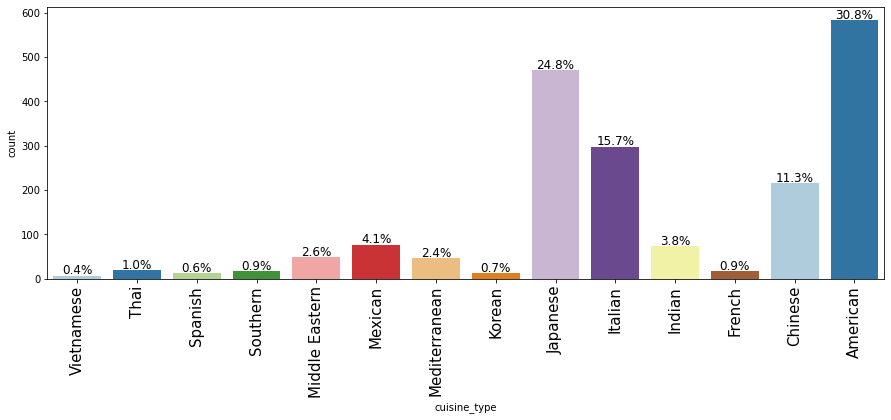

In [89]:
labeled_barplot(df, 'cuisine_type', perc=True)

#### Observations:

* There are 14 unique cuisines in the dataset.

* The distribution of cuisine types show that cuisine types are not equally distributed. 

* The most frequent cuisine type is American followed by Japanese and Italian.

* Vietnamese appears to be the least popular of all the cuisines.

#### Cost of the order

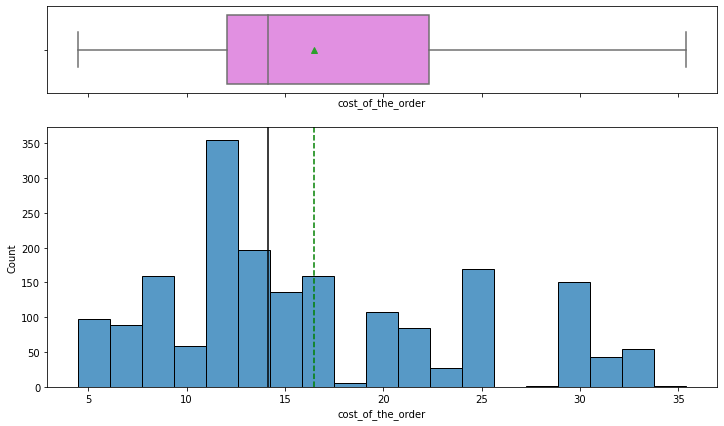

In [20]:
histogram_boxplot(df, 'cost_of_the_order')

#### Observations:

* The average cost of the order is greater than the median cost indicating that the distribution for the cost of the order is right-skewed.

* The mode of the distribution indicates that a large chunk of people prefer to order food that costs around 10-12 dollars.

* There are few orders that cost greater than 30 dollars. These orders might be for some expensive meals.

#### Day of the week

In [21]:
# check the unique values
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

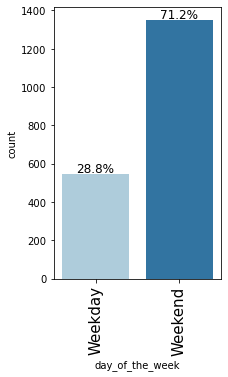

In [22]:
labeled_barplot(df, 'day_of_the_week', perc=True)

#### Observations:

* The 'day_of_the_week' columns consists of 2 unique values - Weekday and Weekend
* The distribution shows that around 71% of all orders are placed on weekends.

#### Rating

In [104]:
# check the unique values
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

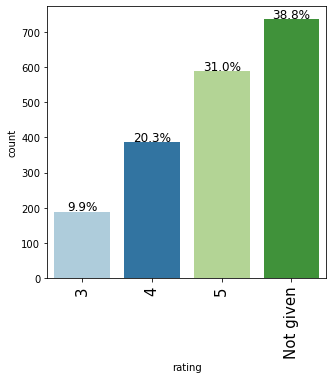

In [24]:
labeled_barplot(df, 'rating', perc=True)

#### Observations:

* The distribution of 'rating' shows that the most frequent rating category is 'not given' (around 39%), followed by a rating of 5 (around 31%).

* Only 10% orders have been rated 3.

#### Food Preparation time

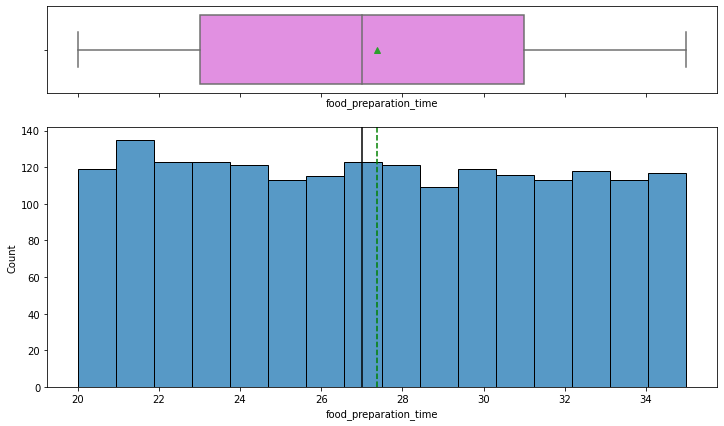

In [25]:
histogram_boxplot(df, 'food_preparation_time', bins = 16)

#### Observations:

* The average food preparation time is almost equal to the median food preparation time indicating that the distribution is nearly symmetrical.

* The food preparation time is pretty evenly distributed between 20 and 35 minutes.

* There are no outliers in this column.

#### Delivery time

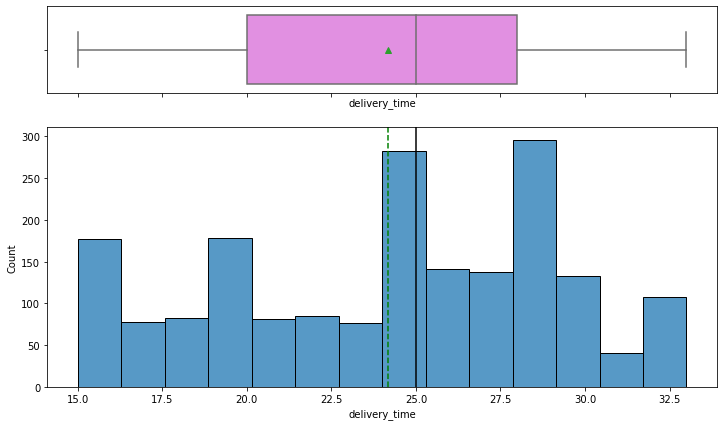

In [26]:
histogram_boxplot(df, 'delivery_time')

#### Observations:

* The average delivery time is a bit smaller than the median delivery time indicating that the distribution is a bit left-skewed.

* Comparatively more number of orders have delivery time between 24 and 30 minutes.

* There are no outliers in this column.

### Question 7: Find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [101]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts()[:5] # list from 0 to 4 ( last number is not included)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

* Top 5 popular restaurants that have received the highest number of orders **'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken' and 'Parm'**. 

* Almost 33% of the orders in the dataset are from these restaurants.


### Question 8: Find the most popular cuisine on weekends. (1 mark)

In [111]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:

* The most popular cuisine type on weekends is American.


### Question 9: Find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [29]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]

# Calculate the number of total orders where the cost is above 20 dollars

print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:

* There are a total of 555 orders that cost above 20 dollars.

* The percentage of such orders in the dataset is around 29.24%.


### Question 10: Find the mean delivery time based on this dataset. (1 mark)

In [30]:
# get the mean delivery time
print('The mean delivery time for this dataset is', round(df['delivery_time'].mean(), 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:

* The mean delivery time is around 24.16 minutes.


### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [31]:
df[df['cost_of_the_order'] == df['cost_of_the_order'].max()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


#### Observations:

* The customer_id of the customer who has spent the maximum amount on a single order is '62359'.

* The order details are:

>  The order_id is '1477814'. 

> The customer ordered at 'Pylos' which is a Mediterranean restaurant.

> The cost of the order was around 35 dollars.

> The order was placed on a weekend.

> The food preparation time and delivery time for the order were 21 minutes and 29 minutes respectively.

> The rating given by the customer is 4.


### Multivariate Analysis

### Question 12: Perform bivariate/multivariate analysis to explore relationships between the variables in the dataset. (7 marks)

#### Cuisine vs Cost of the order

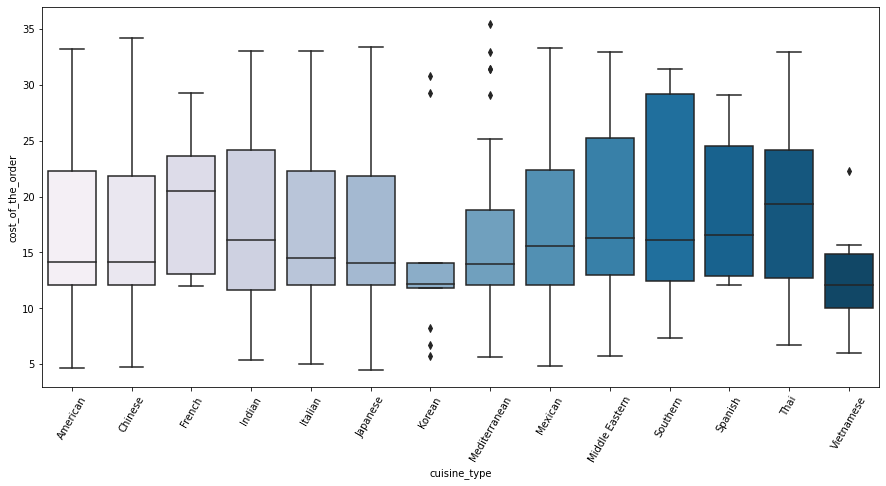

In [32]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:

* Vietnamese and Korean cuisines cost less compared to other cuisines.
* The boxplots for Italian, American, Chinese, Japanese cuisines are quite similar. This indicates that the quartile costs for these cuisines are quite similar.
* Outliers are present for the cost of Korean, Mediterranean and Vietnamese cuisines.
* French and Spanish cuisines are costlier compared to other cuisines.

#### Cuisine vs Food Preparation time

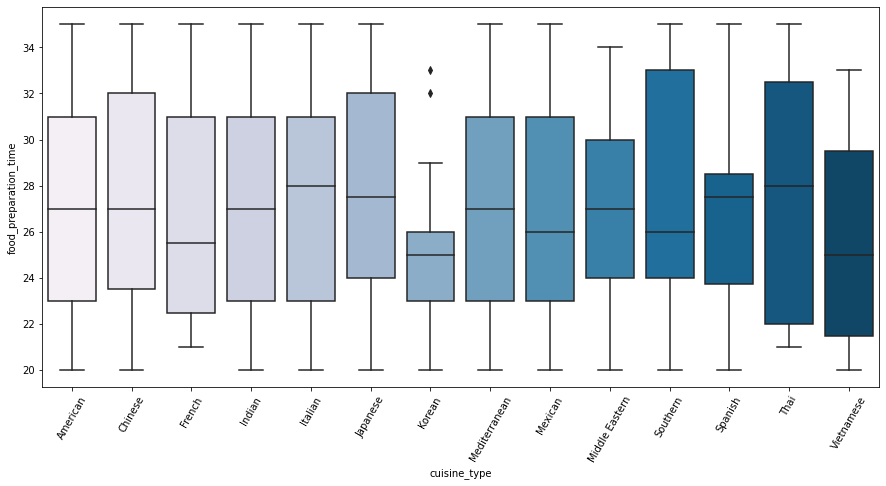

In [33]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:

* Food preparation time is very consistent for most of the cuisines. 
* The median food preparation time lies between 24 and 30 minutes for all the cuisines.
* Outliers are present for the food preparation time of Korean cuisine.
* Korean cuisine takes less time compared to the other cuisines.


#### Day of the Week vs Delivery time

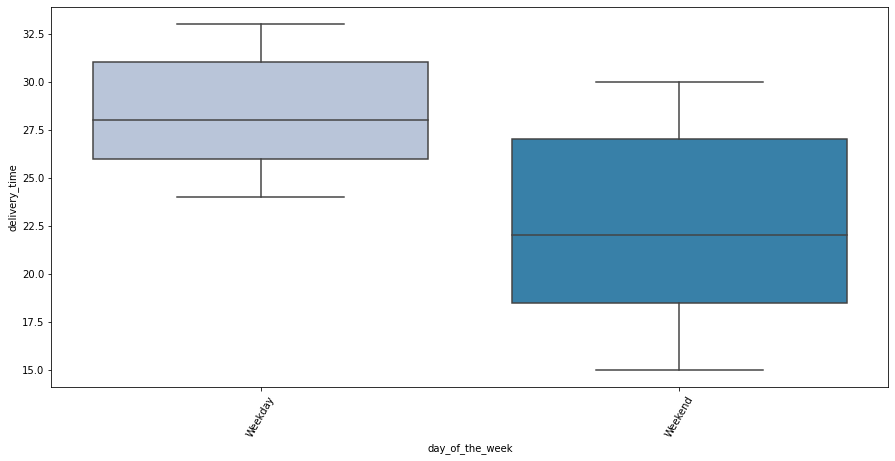

In [34]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:

* The delivery time for all the orders over the weekends is less compared to weekdays. This could be due to the dip in traffic over the weekends.


#### Revenue generated by the restaurants

In [35]:
plt.figure(figsize = (15, 7))
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

<Figure size 1080x504 with 0 Axes>

#### Observations:

* The above 14 restaurants are generating more than 500 dollars revenue.


#### Rating vs Delivery time

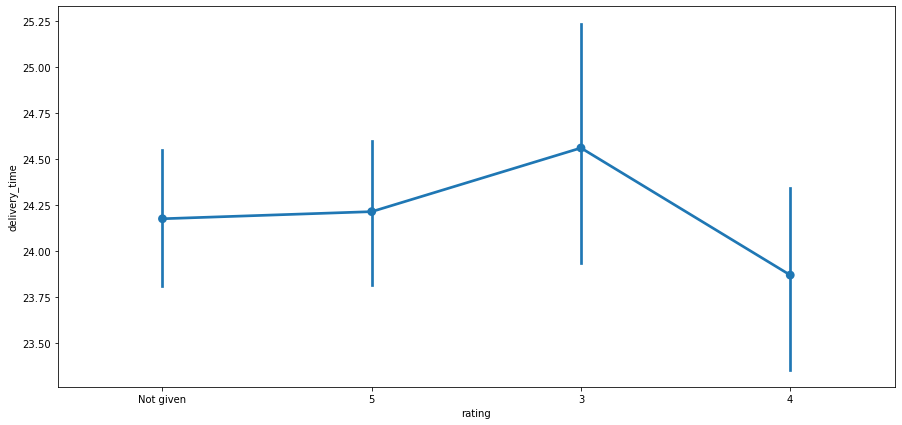

In [36]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Observations:

* It is possible that delivery time plays a role in the low-rating of the orders.


#### Rating vs Food preparation time

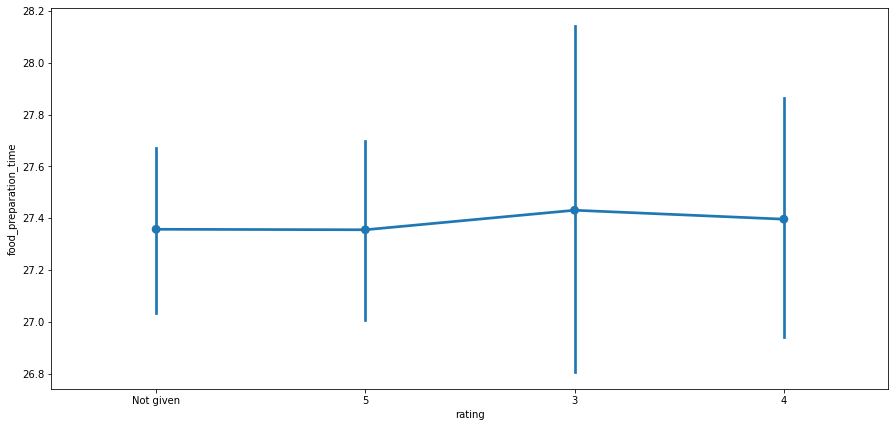

In [37]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

#### Observations:

* It seems that food preparation time does not play a role in the low-rating of the orders.


#### Rating vs Cost of the order

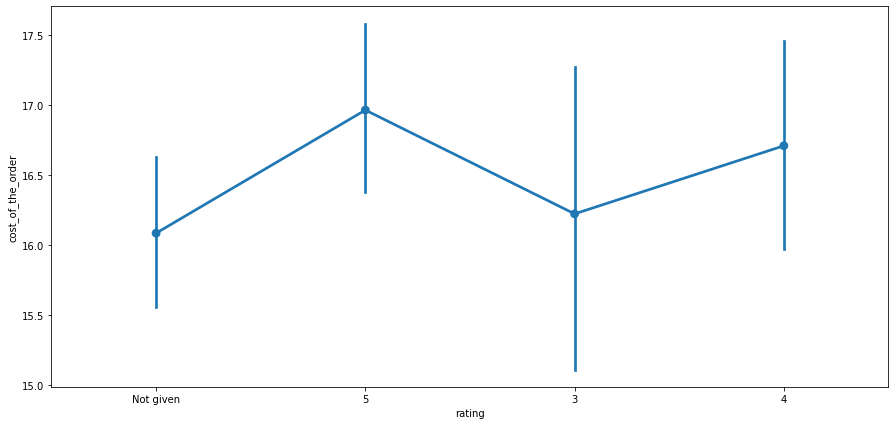

In [38]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

#### Observations

* It seems that high-cost orders have been rated well and low-cost orders have not been rated.

#### Correlation among variables

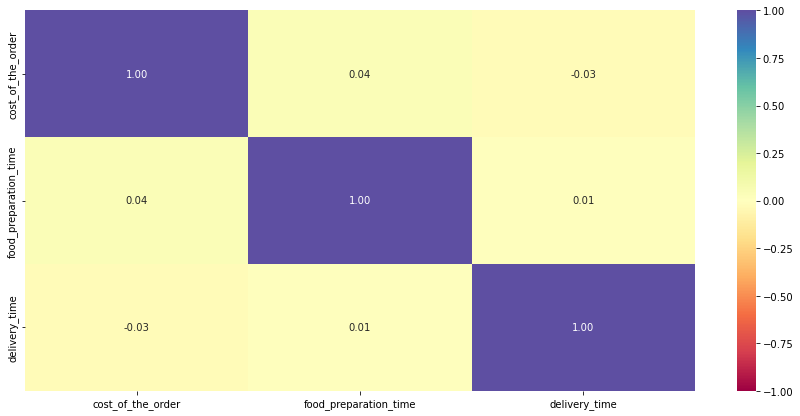

In [39]:

# plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()



#### Observations:

* There is no correlation between cost of the order, delivery time and food preparation time.


### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [40]:
# filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
# convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')
# create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [41]:
# get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
# filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
# find the mean rating of the restaurants
df_mean_4.groupby(df_mean_4['restaurant_name'].cat.remove_unused_categories())['rating'].mean().sort_values(ascending = False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:

* The restaurants fulfilling the criteria to get the promotional offer are: **'The Meatball Shop', 'Blue Ribbon Fried Chicken',  'Shake Shack' and 'Blue Ribbon Sushi'**.


### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [42]:
# add a new column to the dataframe df that stores the company charges
df['foodhub_charge'] = [order_cost * 0.25 if order_cost > 20 else
                        order_cost * 0.15 if order_cost > 5 else
                        0
                        for order_cost in df['cost_of_the_order']]

# get the total revenue and print it
print('The net revenue is around', round(df['foodhub_charge'].sum(), 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations:

* The net revenue generated on all the orders given in the dataset is around 6166.3 dollars.


### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [43]:
# add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# find the percentage of orders that have more than 60 minutes of total delivery time
print ('The percentage of orders that have more than 60 minutes of total delivery time is',
       round(df[df['total_time'] > 60].shape[0] / df.shape[0] * 100, 2),'%')

The percentage of orders that have more than 60 minutes of total delivery time is 10.54 %


#### Observations:

* Approximately 10.54 % of the total orders have more than 60 minutes of total delivery time.


### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [44]:
# get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

# get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:

* The mean delivery time on weekdays is around 28 minutes whereas the mean delivery time on weekends is around 22 minutes.

* This could be due to the dip of traffic volume in the weekends.

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

### Conclusions:

* Around 80% of the orders are for American, Japanese, Italian and Chinese cuisines. Thus, it seems that these cuisines are quite popular among customers of FoodHub. 
* Shake Shack is the most popular restaurant that has received the highest number of orders.
* Order volumes increase on the weekends compared to the weekdays.
* Delivery time over the weekends is less compared to the weekdays. This could be due to the dip in traffic volume over the weekends.
* Around 39% of the orders have not been rated.

### Business Recommendations:

* FoodHub should integrate with restaurants serving American, Japanese, Italian and Chinese cuisines as these cuisines are very popular among FoodHub customers. 

* FoodHub should provide promotional offers to top-rated popular restaurants like Shake Shack that serve most of the orders. 

* As the order volume is high during the weekends, more delivery persons should be employed during the weekends to ensure timely delivery of the order. Weekend promotional offers should be given to the customers to increase the food orders during weekends.

* Customer Rating is a very important factor to gauge customer satisfaction. The company should investigate the reason behind the low count of ratings. They can redesign the rating page in the app and make it more interactive to lure the customers to rate the order. 

* Around 11% of the total orders have more than 60 minutes of total delivery time. FoodHub should try to minimize such instances in order to avoid customer dissatisfaction. They can provide some reward to the punctual delivery persons.